<a href="https://colab.research.google.com/github/Rafael-Barbosa/IA-para-Automacao/blob/main/Aula_7_n_supervisionada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [10]:
# Gerando dados normais
np.random.seed(42)
temperatura = 70 + 0.5 * np.random.randn(1000)
vibracao = 50 + 0.5 * np.random.randn(1000)
energia = 5 + 0.1 * np.random.randn(1000)

# Adicionando algumas anomalias
temperatura_anomalia = [90, 92, 95, 96, 94]
vibracao_anomalia = [60, 62, 59, 63, 61]
energia_anomalia = [7, 7.5, 7.3, 7.6, 7.4]

temperatura = np.concatenate((temperatura, temperatura_anomalia))
vibracao = np.concatenate((vibracao, vibracao_anomalia))
energia = np.concatenate((energia, energia_anomalia))

dados = np.column_stack((temperatura, vibracao, energia))

In [8]:
clf = IsolationForest(contamination=0.01, random_state=42)
preds = clf.fit_predict(dados)

# Encontrando as anomalias
anomalias = dados[preds == -1]

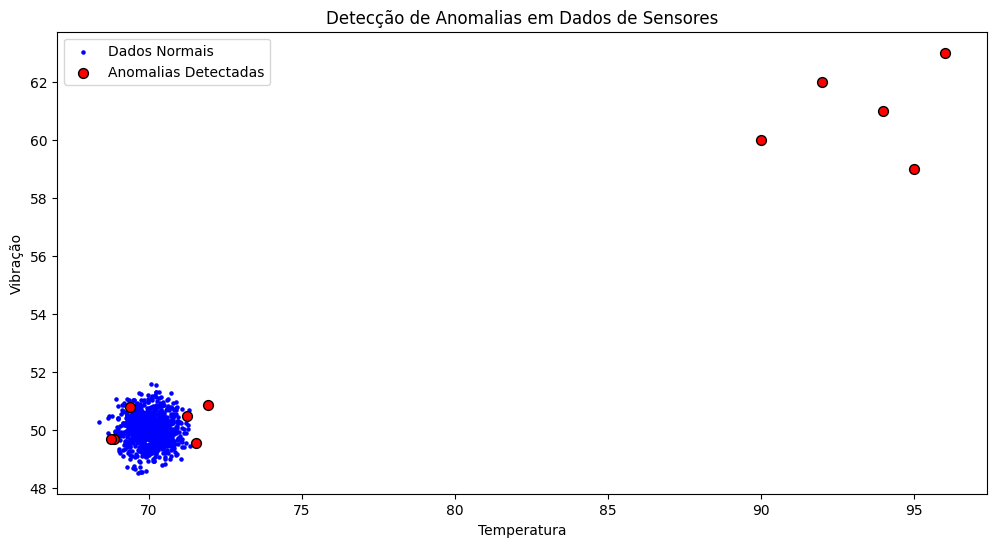

In [9]:
plt.figure(figsize=(12, 6))

plt.scatter(dados[:, 0], dados[:, 1], color='blue', s=5, label='Dados Normais')
plt.scatter(anomalias[:, 0], anomalias[:, 1], color='red', s=50, edgecolor='black', label='Anomalias Detectadas')

plt.xlabel("Temperatura")
plt.ylabel("Vibração")
plt.title("Detecção de Anomalias em Dados de Sensores")
plt.legend()
plt.show()